In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
# Importo i dati 
data = pd.read_csv('C:/Users/massi/OneDrive/Desktop/Titanic.csv')

In [549]:
# Dimensioni del data set
data.shape  # 891 osservazioni x 13 variabili

(891, 13)

In [550]:
# Nomi delle colonne
data.columns.values

array(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [551]:
# Controllo eventuali righe duplicate
data.duplicated().sum()

0

In [552]:
# Rimuovo la colonna Unnamed: 0
data.drop('Unnamed: 0', inplace=True, axis=1)

In [553]:
# Rimuovo la colonna PassengerId
data.drop('PassengerId', inplace=True, axis=1)

In [554]:
# Rimuovo la colonna Ticket
data.drop('Ticket', inplace=True, axis=1)

In [555]:
# Rimuovo la colonna Name
data.drop('Name', inplace=True, axis=1)

In [556]:
# Ricontrollo la dimensione del data set
data.shape

(891, 9)

In [557]:
data # display data set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [558]:
# Struttura del data set 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [559]:
# Controllo eventuali valori mancanti
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [560]:
# Elimino la variabile Cabin 
data.drop('Cabin', inplace=True, axis=1)

In [561]:
# Elimino le due osservazioni in cui Embarked is null
index = data[data['Embarked'].isnull()].index.tolist() # Indici
data.drop(data.index[index], inplace=True)

In [562]:
# Metodo di imputazione per Age -> Mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

In [563]:
# Data information and visualization
not_survived = round((sum(data['Survived'] == 0) / data.shape[0]) * 100, 2) # Not Survived
survived = round((sum(data['Survived'] == 1) / data.shape[0]) * 100, 2)  # Survived
print(f"Non sopravvisuti -> {not_survived}%, Sopravvisuti --> {survived}%.")

Non sopravvisuti -> 61.75%, Sopravvisuti --> 38.25%.


' Le donne sopravvisute presentano un conteggio maggiore rispetto agli uomini sopravvisuti, viceversa\n    gli uomini non sopravvisuti presentano un conteggio maggiore rispetto alle donne non sopravvisute '

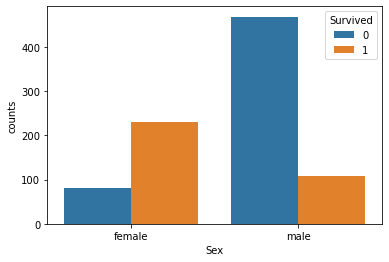

In [564]:
# Survived vs Sex
analytics_1 = data.groupby(['Survived','Sex']).size().reset_index(name='counts')
sns.barplot(x='Sex',y='counts', hue='Survived',data = analytics_1)

''' Le donne sopravvisute presentano un conteggio maggiore rispetto agli uomini sopravvisuti, viceversa
    gli uomini non sopravvisuti presentano un conteggio maggiore rispetto alle donne non sopravvisute '''

' In terza classe si ha il conteggio maggiore relativo al numero di persone non sopravvisute, mentre in prima classe \n    si ha il conteggio maggiore relativo al numero di persone sopravvisute '

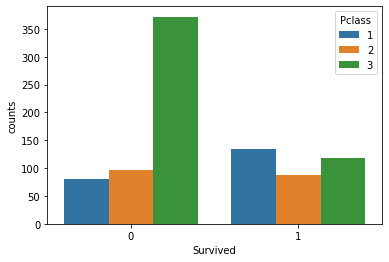

In [565]:
# Survived vs Pclass
analytics_2 = data.groupby(['Survived', 'Pclass']).size().reset_index(name='counts')
sns.barplot(x='Survived',y='counts', hue='Pclass',data = analytics_2)

''' In terza classe si ha il conteggio maggiore relativo al numero di persone non sopravvisute, mentre in prima classe 
    si ha il conteggio maggiore relativo al numero di persone sopravvisute '''

In [566]:
# Fare  -> Descriptive statistics
data['Fare'].describe() # Conteggio - Media - Deviazione Standard - Minimo - Quantile 25% - Mediana - Quantile 75% - Massimo


count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [567]:
''' In media la tariffa passeggera è pari a 32 dollari, mentre il valore mediano è pari a 14.45. Le tarfiffe più care presentano
    un valore superiore ai 31 dollari, mentre la più costosa è pari a 512 dollari. '''

' In media la tariffa passeggera è pari a 32 dollari, mentre il valore mediano è pari a 14.45. Le tarfiffe più care presentano\n    un valore superiore ai 31 dollari, mentre la più costosa è pari a 512 dollari. '

' Le tariffe passeggere più costose riguardano la prima classe, con un valore mediano che si aggira intorno ai 60 dollari. '

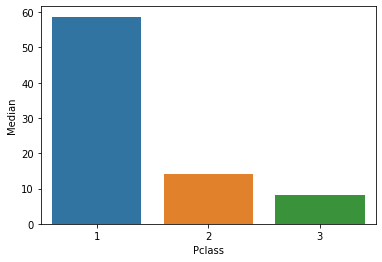

In [568]:
# Fare vs Pclass
analytics_3 = data.groupby(['Pclass']).Fare.median().reset_index(name='Median')
sns.barplot(x='Pclass', y ='Median', data=analytics_3 )

''' Le tariffe passeggere più costose riguardano la prima classe, con un valore mediano che si aggira intorno ai 60 dollari. '''

In [569]:
# Fare vs Sex
analytics_4 = data.groupby(['Sex']).Fare.median().reset_index(name='Median')
analytics_4

,Sex,Median
0,female,23.0
1,male,10.5


In [570]:
''' Medianamente la tariffa passeggera relativa al sesso femminile è più costosa, viceversa la tariffa passeggera relativa
    al sesso maschile è meno costosa. La mediana è robusta ad eventuali valori anomali, in questo caso tariffe passeggere
    molto elevate. '''

' Medianamente la tariffa passeggera relativa al sesso femminile è più costosa, viceversa la tariffa passeggera relativa\n    al sesso maschile è meno costosa. La mediana è robusta ad eventuali valori anomali, in questo caso tariffe passeggere\n    molto elevate. '

' Il grafico racchiude quanto detto in precedenza, le donne presentano una tariffa passeggera più elevata, e le tariffe \n    passeggere sono più elevate per la prima classe. Le donne in prima classe presentano la tariffa passeggera più elevata'

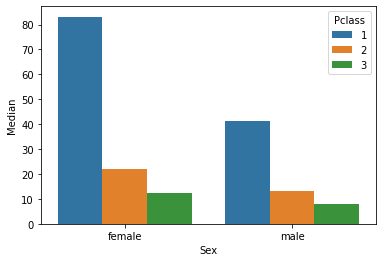

In [571]:
# Fare  vs Sex vs Pclass
analytics_5 = data.groupby(['Sex','Pclass']).Fare.median().reset_index(name='Median')
sns.barplot(x='Sex', y='Median', hue='Pclass', data=analytics_5)

''' Il grafico racchiude quanto detto in precedenza, le donne presentano una tariffa passeggera più elevata, e le tariffe 
    passeggere sono più elevate per la prima classe. Le donne in prima classe presentano la tariffa passeggera più elevata'''

' Medianamente la tariffa passeggera è più elevata per gli uomini e le donne che si sono imbaracti dal porto di Cherbourg\n    in Normandia.'

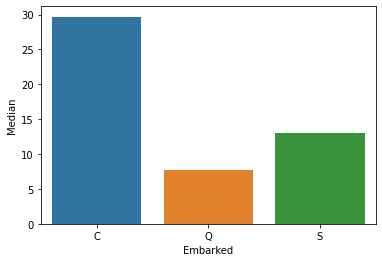

In [572]:
# Fare vs Embark
analytics_6 = data.groupby(['Embarked']).Fare.median().reset_index(name='Median')
sns.barplot(x='Embarked', y='Median', data=analytics_6)

''' Medianamente la tariffa passeggera è più elevata per gli uomini e le donne che si sono imbaracti dal porto di Cherbourg
    in Normandia.'''

In [573]:
# Correlation
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


In [574]:
''' Le variabili Pclass e Fare presentano la correlazione più elevata, pari a -0.54. Il loro rapporto è 
    inversamente proporzionale, infatti all'aumentare di Pclass, Fare diminuisce.  '''

" Le variabili Pclass e Fare presentano la correlazione più elevata, pari a -0.54. Il loro rapporto è \n    inversamente proporzionale, infatti all'aumentare di Pclass, Fare diminuisce.  "

In [575]:
# Machine learning

In [576]:
# Cambio struttura del data set -> OneHotEncoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse=False), ['Pclass', 'Sex', 'Embarked']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
transformed_data = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

''' Applichiamo alle variabili di tipo categoriale il OneHotEncoding '''

' Applichiamo alle variabili di tipo categoriale il OneHotEncoding '

In [577]:
transformed_data # Pclass1, Female, EmbarkedC -> Baseline

,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_male,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Survived,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,0.0,1.0,1.0,0.0,1.0,0.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,1.0,0.0,0.0,1.0,1.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,1.0,0.0,1.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,1.0,0.0,1.0,0.0,1.0,0.0,27.0,0.0,0.0,13.0000
885,0.0,0.0,0.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000
886,0.0,1.0,0.0,0.0,1.0,0.0,28.0,1.0,2.0,23.4500
887,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,30.0000


In [578]:
''' Per evitare la trappola delle variabili dummy bisogna inserire nel modello un numero di dummy
    che è sempre pari a uno in meno rispetto ai vari livelli che la variabile categoriale in esame
    assume. Questo è importate per evitare il problema della multicollinearità. '''

' Per evitare la trappola delle variabili dummy bisogna inserire nel modello un numero di dummy\n    che è sempre pari a uno in meno rispetto ai vari livelli che la variabile categoriale in esame\n    assume. Questo è importate per evitare il problema della multicollinearità. '

In [579]:
# Nuove dimensioni del data set
transformed_data.shape

(889, 10)

In [580]:
# Colonne del data set trasformato
transformed_data.columns.values

array(['onehotencoder__Pclass_2', 'onehotencoder__Pclass_3',
       'onehotencoder__Sex_male', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'remainder__Survived',
       'remainder__Age', 'remainder__SibSp', 'remainder__Parch',
       'remainder__Fare'], dtype=object)

In [581]:
# Rinominiamo le colonne del data set
transformed_data.columns = ['Passenger Class2', 'Passenger Class3', 'Male',
                           'Port_of_Embarkation_Q', 'Port_of_Embarkation_S', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']

In [582]:
transformed_data.columns.values # Nuovi nomi delle colonne

array(['Passenger Class2', 'Passenger Class3', 'Male',
       'Port_of_Embarkation_Q', 'Port_of_Embarkation_S', 'Survived',
       'Age', 'SibSp', 'Parch', 'Fare'], dtype=object)

In [583]:
transformed_data # display data set 

,Passenger Class2,Passenger Class3,Male,Port_of_Embarkation_Q,Port_of_Embarkation_S,Survived,Age,SibSp,Parch,Fare
0,0.0,1.0,1.0,0.0,1.0,0.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,1.0,0.0,0.0,1.0,1.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,1.0,0.0,1.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,1.0,0.0,1.0,0.0,1.0,0.0,27.0,0.0,0.0,13.0000
885,0.0,0.0,0.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000
886,0.0,1.0,0.0,0.0,1.0,0.0,28.0,1.0,2.0,23.4500
887,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,30.0000


In [584]:
transformed_data.isnull().sum()

Passenger Class2         0
Passenger Class3         0
Male                     0
Port_of_Embarkation_Q    0
Port_of_Embarkation_S    0
Survived                 0
Age                      0
SibSp                    0
Parch                    0
Fare                     0
dtype: int64

In [585]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Passenger Class2       889 non-null    float64
 1   Passenger Class3       889 non-null    float64
 2   Male                   889 non-null    float64
 3   Port_of_Embarkation_Q  889 non-null    float64
 4   Port_of_Embarkation_S  889 non-null    float64
 5   Survived               889 non-null    float64
 6   Age                    889 non-null    float64
 7   SibSp                  889 non-null    float64
 8   Parch                  889 non-null    float64
 9   Fare                   889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


In [586]:
# Split data in Train and Test set 
features = ['Passenger Class2','Passenger Class3', 'Male', 'Port_of_Embarkation_Q', 'Port_of_Embarkation_S',
           'Age', 'SibSp', 'Parch', 'Fare']

X = transformed_data.loc[:, features]  

y = transformed_data.loc[:, ['Survived']] 

In [587]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

''' Dividiamo il data set in Train and Test set. Il train set è composto dall’75%
    delle osservazioni totali, mentre il test set è composto dall’25% delle osservazioni rimanenti. '''

' Dividiamo il data set in Train and Test set. Il train set è composto dall’75%\n    delle osservazioni totali, mentre il test set è composto dall’25% delle osservazioni rimanenti. '

In [588]:
# Standardization
from sklearn.preprocessing import StandardScaler
X_train[['Age', 'Fare']] = StandardScaler().fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = StandardScaler().fit_transform(X_test[['Age', 'Fare']])

''' Standardizziamo le colonne numeriche Age e Fare '''

' Standardizziamo le colonne numeriche Age e Fare '

In [589]:
# Models 

In [590]:
# KNN -> K = 5 Train set
from sklearn import neighbors
knn_5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train.values.ravel())

''' Addestriamo il modello KNN con K = 5 sui dati di training '''

' Addestriamo il modello KNN con K = 5 sui dati di training '

In [591]:
# KNN -> K = 10 Train set
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train.values.ravel())

''' Addestriamo il modello KNN con K = 10 sui dati di training '''

' Addestriamo il modello KNN con K = 10 sui dati di training '

In [592]:
# Predict on Test set

In [593]:
knn_5.predict(X_test) 

''' Previsione sui dati di test utilizzando il modello knn con k = 5 addestrato in precedenza sui dati di training '''

' Previsione sui dati di test utilizzando il modello knn con k = 5 addestrato in precedenza sui dati di training '

In [594]:
knn_10.predict(X_test)


''' Previsione sui dati di test utilizzando il modello knn con k = 10 addestrato in precedenza sui dati di training '''

' Previsione sui dati di test utilizzando il modello knn con k = 10 addestrato in precedenza sui dati di training '

In [595]:
# Accuracy Score Test set KNN -> K = 5 
round(knn_5.score(X_test, y_test),2) # 75 % Accuracy 

''' L'accuratezza è pari all'75%. 75 volte su 100 classifichiamo correttamente le osservazioni del test set '''

" L'accuratezza è pari all'75%. 75 volte su 100 classifichiamo correttamente le osservazioni del test set "

In [596]:
# Confusion Matrix KNN -> K = 5 on Test set

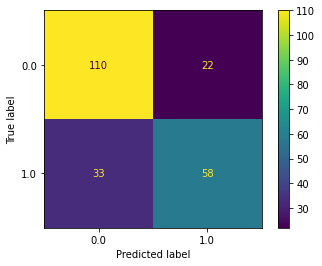

' 110 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate\n    58  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate\n    22  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse\n    sono non sopravvisute\n    33  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse\n    sono sopravvisute. '

In [597]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn_5.predict(X_test), labels=knn_5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn_5.classes_)
disp.plot()
plt.show()


''' 110 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate
    58  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate
    22  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse
    sono non sopravvisute
    33  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse
    sono sopravvisute. ''' 

In [598]:
# Classification Report KNN -> K = 5 on Test set

In [599]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_5.predict(X_test)))

''' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)
    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)
    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'''

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       132
         1.0       0.72      0.64      0.68        91

    accuracy                           0.75       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)\n    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)\n    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'

In [600]:
# Accuracy Score Test set KNN -> K = 10 
round(knn_10.score(X_test, y_test),2) # 77 % Accuracy

''' L'accuratezza è pari all'77%. 77 volte su 100 classifichiamo correttamente le osservazioni del test set '''

" L'accuratezza è pari all'77%. 77 volte su 100 classifichiamo correttamente le osservazioni del test set "

In [601]:
# Confusion Matrix KNN -> K = 10 on Test set

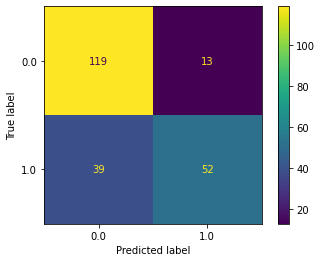

' 119 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate\n    52  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate\n    13  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse\n    sono non sopravvisute\n    39  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse\n    sono sopravvisute. '

In [602]:
cm = confusion_matrix(y_test, knn_10.predict(X_test), labels=knn_10.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn_10.classes_)
disp.plot()
plt.show()

''' 119 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate
    52  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate
    13  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse
    sono non sopravvisute
    39  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse
    sono sopravvisute. ''' 

In [603]:
# Classification Report KNN -> K = 10 on Test set

In [604]:
print(classification_report(y_test, knn_10.predict(X_test)))

''' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)
    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)
    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'''

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       132
         1.0       0.80      0.57      0.67        91

    accuracy                           0.77       223
   macro avg       0.78      0.74      0.74       223
weighted avg       0.77      0.77      0.76       223



' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)\n    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)\n    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'

In [605]:
# Regressione Logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lrModel = lr.fit(X_train, y_train.values.ravel())

''' Addestriamo il modello logistico sui dati di training set'''

' Addestriamo il modello logistico sui dati di training set'

In [606]:
# Predict on Test set

In [607]:
lrModel.predict(X_test) # Previsioni -> 1: Sopravvisuto 0: Non sopravvisuto
 

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1.])

In [608]:
# Accuracy Score Test set Regressione Logistica 
round(lrModel.score(X_test, y_test),2) # 76 % Accuracy 

''' L'accuratezza è pari all'76%. 76 volte su 100 classifichiamo correttamente le osservazioni del test set '''

" L'accuratezza è pari all'76%. 76 volte su 100 classifichiamo correttamente le osservazioni del test set "

In [609]:
# Confusion Matrix Regressione Logistica on Test set

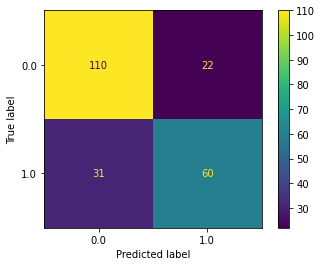

' 110 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate\n    60  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate\n    22  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse\n    sono non sopravvisute\n    31  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse\n    sono sopravvisute. '

In [610]:
cm = confusion_matrix(y_test, lrModel.predict(X_test), labels=lrModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lrModel.classes_)
disp.plot()
plt.show()

''' 110 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate
    60  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate
    22  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse
    sono non sopravvisute
    31  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse
    sono sopravvisute. ''' 

In [611]:
# Classification Report Regressione Logistica on Test set

In [612]:
print(classification_report(y_test, lrModel.predict(X_test)))

''' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)
    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)
    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'''

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       132
         1.0       0.73      0.66      0.69        91

    accuracy                           0.76       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)\n    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)\n    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'

In [613]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnbModel = gnb.fit(X_train, y_train.values.ravel())

In [614]:
# Predict on Test set

In [615]:
gnbModel.predict(X_test) # Previsioni -> 1: Sopravvisuto 0: Non sopravvisuto

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1.])

In [616]:
# Accuracy Score Test set Naive Bayes
round(gnbModel.score(X_test, y_test),2) # 76 % Accuracy 

''' L'accuratezza è pari all'76%. 76 volte su 100 classifichiamo correttamente le osservazioni del test set '''

" L'accuratezza è pari all'76%. 76 volte su 100 classifichiamo correttamente le osservazioni del test set "

In [617]:
# Confusion Matrix Naive Bayes on Test set

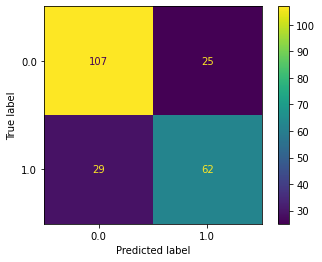

' 107 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate\n    62  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate\n    25  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse\n    sono non sopravvisute\n    29  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse\n    sono sopravvisute. '

In [618]:
cm = confusion_matrix(y_test, gnbModel.predict(X_test), labels=gnbModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gnbModel.classes_)
disp.plot()
plt.show()

''' 107 -> TRUE NEGATIVE(Veri negativi) -> Persone non sopravvisute correttamente classificate
    62  -> TRUE POSITIVE(Veri positivi) -> Persone sopravvisute correttamente classificate
    25  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come sopravvisute, ma in realtà esse
    sono non sopravvisute
    29  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non sopravvisute, ma in realtà esse
    sono sopravvisute. ''' 

In [619]:
# Classification Report Naive Bayes regressione Logistica on Test set

In [620]:
print(classification_report(y_test, gnbModel.predict(X_test)))

''' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)
    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)
    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'''

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       132
         1.0       0.71      0.68      0.70        91

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)\n    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)\n    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'

In [621]:
import numpy as np
# creating the Numpy array
array = np.array([[0, 1, 1, 0, 1, 40, 0, 0, 31.0], [1, 0, 0, 1, 0, 20, 0, 0, 31],
                 [0, 1, 1, 0, 1, 35, 1, 1, 7 ], 
                 [0, 0, 0, 1, 0, 15, 0, 0, 31]])
  
# creating a list of index names
index_values = ['first', 'second', 'third', 'fourth']
   
# creating a list of column names
column_values = ['Passenger Class2', 'Passenger Class3', 'Male',
       'Port_of_Embarkation_Q', 'Port_of_Embarkation_S', 'Age', 'SibSp',
       'Parch', 'Fare']
  
# creating the dataframe
df = pd.DataFrame(data = array, 
                  index = index_values, 
                  columns = column_values)

# First observation -> Pclass3 - Male - Port_of_Embarkation_S - 40 Age - 31 Fare
# Second observation -> Pclass2- Female - Port_of_Embarkation_Q - 20 Age - 31 Fare  
# Third observation -> Pclass3 - Male- Port_of_Embarkation_S - 35 Age - 1 SibSp - 1 Parch - 31 Fare
# Fourth observation -> Pclass1 - Female - Port_of_Embarkation_Q - 15 Age - 31 Fare 

In [622]:
 df # display observations

,Passenger Class2,Passenger Class3,Male,Port_of_Embarkation_Q,Port_of_Embarkation_S,Age,SibSp,Parch,Fare
first,0.0,1.0,1.0,0.0,1.0,40.0,0.0,0.0,31.0
second,1.0,0.0,0.0,1.0,0.0,20.0,0.0,0.0,31.0
third,0.0,1.0,1.0,0.0,1.0,35.0,1.0,1.0,7.0
fourth,0.0,0.0,0.0,1.0,0.0,15.0,0.0,0.0,31.0


In [623]:
# Predict on df KNN -> K = 5
knn_5.predict(df) # Survived, Survived, Not Survived, Survived

array([1., 1., 0., 1.])

In [624]:
# Predict on df KNN -> K = 10
knn_10.predict(df) # Survived, Survived, Not Survived, Survived

array([1., 1., 0., 1.])

In [625]:
# Predict on df Regressione Logistica
lrModel.predict(df) # Not Survived, Not Survived, Not Survived, Not Survived 

array([0., 0., 0., 0.])

In [626]:
gnbModel.predict(df) # Survived, Survived, Survived, Survived

array([1., 1., 1., 1.])